In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
#dataset["Geography"].unique()
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)
X = pd.concat([X,geography,gender], axis=1)
X=X.drop(['Geography','Gender'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.layers import PReLU,ELU

In [13]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu',input_dim=11))
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs=100)
#print(model_history.history_keys())

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.7102 - val_loss: 0.4704 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.7983 - val_loss: 0.4360 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4209 - accuracy: 0.8112 - val_loss: 0.4216 - val_accuracy: 0.8129
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4059 - accuracy: 0.8244 - val_loss: 0.4091 - val_accuracy: 0.8220
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8339 - val_loss: 0.3964 - val_accuracy: 0.8285
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.8433 - val_loss: 0.3874 - val_accuracy: 0.8364
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3675 - accuracy: 0.8461 - val_loss: 0.3814 - val_accuracy: 0.8364

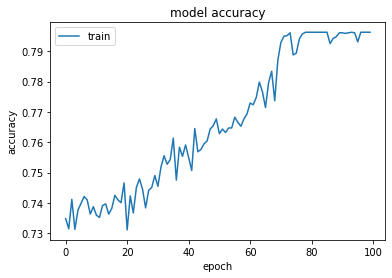

In [18]:
plt.plot(model_history.history['accuracy'])
#plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()